In [34]:
import os
import re
from PIL import Image
import numpy as np

def read_images(directory):
    x_train = []
    y_train = []
    target_width = 92
    target_height = 112
    
    # Loop through each friend's directory in the train directory
    for friend_dir in os.listdir(directory):
        friend_path = os.path.join(directory, friend_dir)
        
        # Check if the path is a directory
        if os.path.isdir(friend_path):
            print(f"Processing directory: {friend_path}")  # Print the current directory being processed
            
            # Loop through each image in the friend's directory
            for image_file in os.listdir(friend_path):
                image_path = os.path.join(friend_path, image_file)
                
                try:
                    # Check if the file is an image
                    if os.path.isfile(image_path) and image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        # Open the image using PIL and convert to grayscale
                        img = Image.open(image_path).convert('L')
                        
                        # Resize the image to a consistent shape
                        img = img.resize((target_width, target_height))
                        
                        # Convert the image to numpy array
                        img_array = np.array(img)
                        
                        # Append the image array to x_train
                        x_train.append(img_array)

                        # Extract the friend's name from the image filename
                        friend_name = extract_friend_name(image_file)

                        # Append the friend's name to y_train
                        y_train.append(friend_name)
                except Exception as e:
                    print(f"Error reading image {image_path}: {e}")
    
    return np.array(x_train), np.array(y_train)

def extract_friend_name(image_filename):
    # Extract friend's name from the image filename
    if '_' in image_filename:
        friend_name = image_filename.split('_')[0]  # Assuming friend's name is before the first underscore
    else:
        # If underscore is not present, find the index of the first number
        idx = next((i for i, c in enumerate(image_filename) if c.isdigit()), None)
        if idx is not None:
            friend_name = image_filename[:idx]  # Extract name before the first number
        else:
            friend_name = image_filename.split('.')[0]  # Assuming friend's name is before the first dot (.)
    return friend_name

# Provide the path to the train directory
train_directory = r"F:\Sem6\Computer Vision\Lab\Lab8\Train"  # Use raw string literal to avoid escaping backslashes

# Read images and corresponding labels
x_train, y_train = read_images(train_directory)

# Print the shape of x_train and y_train
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)


Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Aadit Sharma on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Aman Verma on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Anudeep Talari on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Anurag Deo on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Archit Sharma on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Aritra Bhaduri on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Arkadeep Acharya on Mar 4, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Aryan Sahoo on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 files from Ashutosh Kumar on Mar 5, 2024
Processing directory: F:\Sem6\Computer Vision\Lab\Lab8\Train\10 fil

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
data = x_train.reshape(350, -1)     # Reshape images to (900, 244*244*3)
print(data.shape)
# Apply LDA
lda = LDA(n_components=2)
images = lda.fit_transform(data, y_train)

# Resulting shape
print("Shape after LDA:", images.shape)


(350, 10304)
Shape after LDA: (350, 2)


In [36]:
'''finding number of images in each class'''  # required for computing recall

total_class_count = {}
COUNT=[]

for i in range(len(y_train)):
    a = y_train[i]

    if(a in total_class_count):
        total_class_count[a] = total_class_count[a] + 1
    else:
        total_class_count[a] = 1

for j in total_class_count:
    COUNT.append(total_class_count[j])

print(total_class_count)
print(len(COUNT))

{'aadit': 10, 'Aman': 10, 'Anudeep': 10, 'Anurag': 10, 'Archit': 10, 'aritra': 10, 'arkadeep': 10, 'Aryan': 10, 'Ashutosh': 10, 'atul': 10, 'Bhavika': 10, 'Biswajit': 10, 'ankith': 10, 'Devendra': 10, 'Pichikala': 10, 'eshwar': 10, 'Haritha': 10, 'Ishani': 10, 'Karthik': 10, 'lalit': 10, 'Mukund': 10, 'Pragya': 10, 'prakash': 10, 'rakesh': 10, 'vinod': 10, 'sravanth': 10, 'Shrey': 10, 'deshik': 10, 'sreya': 10, 'sunny': 10, 'swapnil': 10, 'Tejas': 10, 'toshit': 10, 'varshith': 10, 'yashveer': 10}
35


In [37]:
'''CLASS START INDEX'''   # required for clustering
class_start_index = []
count = 0
for i in range(len(COUNT)+1):
    if(i < len(COUNT)):
        class_start_index.append(count)
        count = count + COUNT[i]
    else:
        count = len(y_train)
        class_start_index.append(count)
        break

num_of_class = len(class_start_index)
print(class_start_index)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350]


In [38]:
import os
import numpy as np
from math import floor
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def ClusterIndicesNumpy(clustNum, labels_array): #numpy
    return np.where(labels_array == clustNum)[0]

In [39]:
'''dividing the data/features of each class into clusters'''

clusters = [[] for j in range(len(COUNT))]
represent_points = [[] for j in range(len(COUNT))]


class_index = class_start_index
class_index.append(len(y_train))


for i in range(0,len(COUNT)):
    start = class_start_index[i]                 # starting index of features to be considered for clustering (starting index of a class)
    end = class_start_index[i+1]                 # ending index of features to be considered for clustering (end index of a class)
    n_clusters = floor((end-start) * (20/100))   # number of clusteres to be formed is 20% of the entire dataset (can be varied)

    if(n_clusters<1):
        n_clusters = 1

    print(end-start,i, n_clusters)

    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(images[start:end])

    for n in range(n_clusters):
        a = ClusterIndicesNumpy(n, kmeans.labels_)
        clusters[i].append(list(a))

    represent_points[i].extend(kmeans.cluster_centers_)

10 0 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 1 2
10 2 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 3 2
10 4 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 5 2
10 6 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 7 2
10 8 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 9 2
10 10 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 11 2
10 12 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 13 2
10 14 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 15 2
10 16 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 17 2
10 18 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 19 2
10 20 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 21 2
10 22 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 23 2
10 24 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 25 2
10 26 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 27 2
10 28 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 29 2
10 30 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 31 2
10 32 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 33 2
10 34 2


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
print(len(represent_points), len(represent_points[0]), len(represent_points[0][0]))

35 2 2


In [41]:
def image_search(query_features,top_k_class):

    distance = [[] for j in range(num_of_class)]


    for i in range(len(represent_points)):
        for j in range(len(represent_points[i])):
            d = np.linalg.norm(represent_points[i][j] - query_features)
            distance[i].append(d)

    dist=[]
    class_name = []

    for i in range(len(COUNT)):
        dist.append(min(distance[i]))

    for i in range(top_k_class):
        ind = dist.index(min(dist))
        class_name.append(ind)
        dist[ind] = 10000

    return class_name

In [42]:
def fine_search(query_features,class_names,top_k):
    dist = []
    k = []

    class_index = class_start_index

    for l in range(top_k):
        dist.append(10000 * (l+1) )
        k.append(0)

    for i in range(len(class_names)):
        for j in range(class_index[class_names[i]] , class_index[class_names[i]+1]):
            d = np.linalg.norm(query_features - images[j])
#             print(d,j)
            if(d < max(dist) ):
                maxpos = dist.index(max(dist))

                dist.remove(max(dist))
                dist.append(d)

                k.pop(maxpos)
                k.append(j)
    return k

In [43]:
test = []
for i in range(10):
    k = random.randint(0, (len(y_train)-1))
    test.append(k)

print(test)


[233, 6, 302, 18, 94, 39, 25, 306, 98, 59]


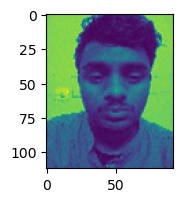

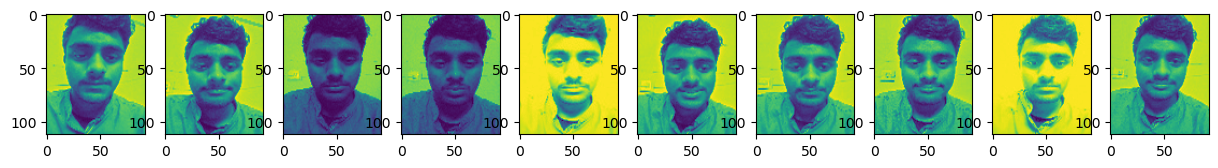

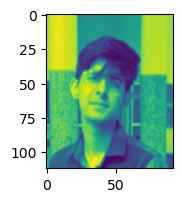

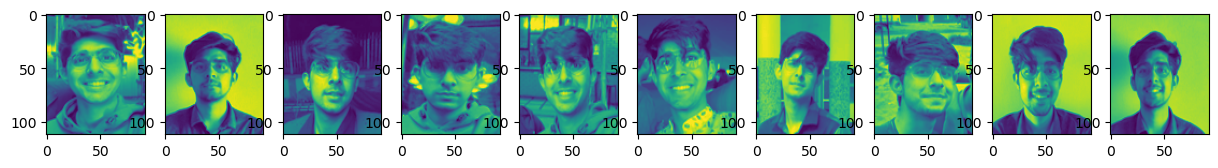

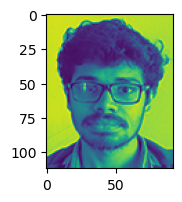

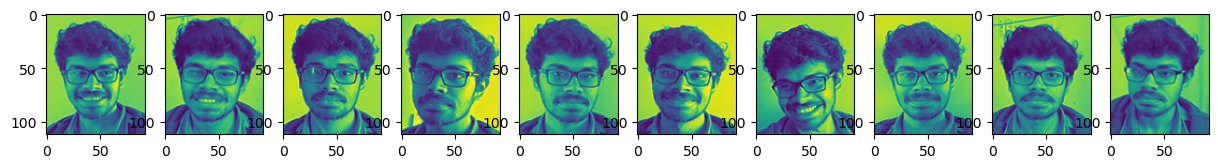

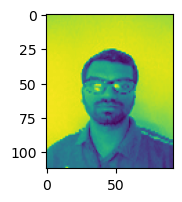

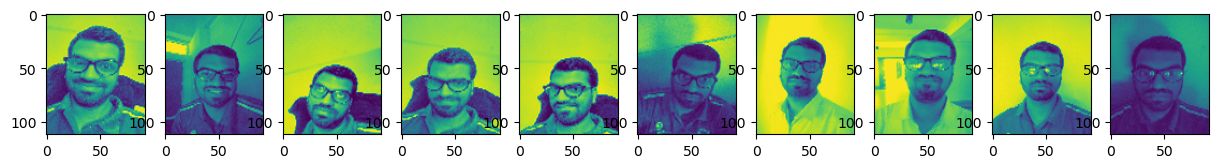

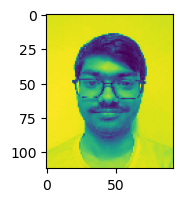

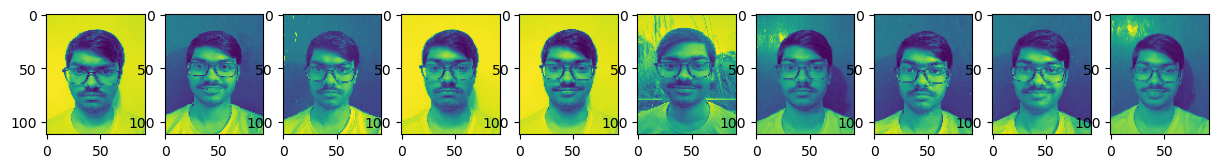

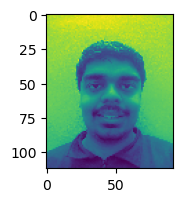

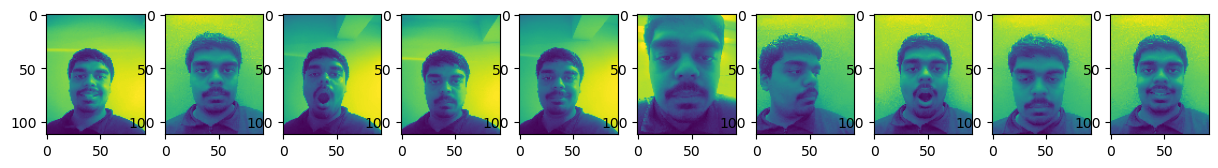

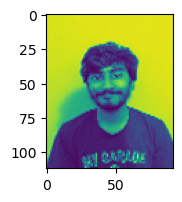

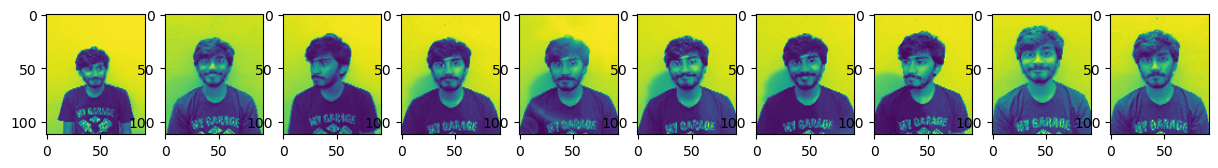

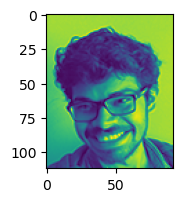

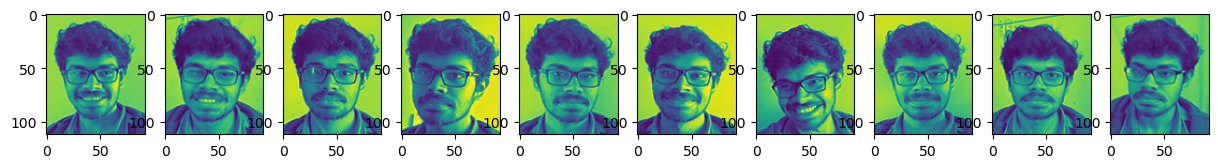

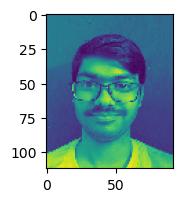

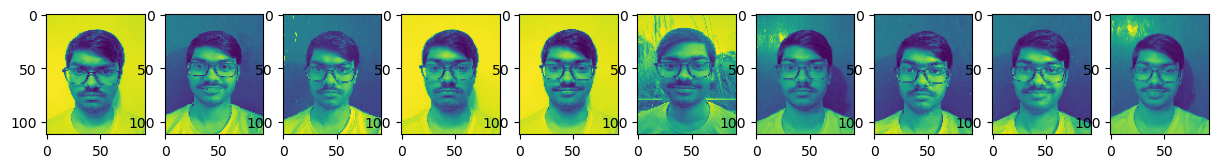

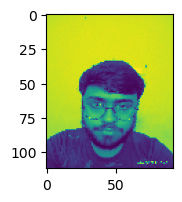

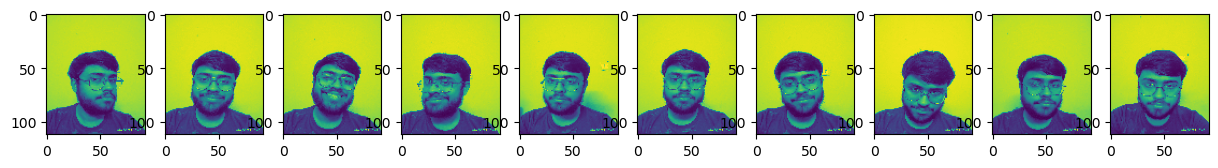

In [44]:
''' for reverse image retrieval'''

for k in range(len(test)):
    top_k = 10

    result = image_search(images[test[k]],1)
    index = fine_search(images[test[k]],result,top_k)

    # displaying the query image
    plt.figure(figsize=(2,2))
    img = x_train[test[k]]
    plt.imshow(img)
    plt.show()

    # displaying the results obtained
    plt.figure(figsize=(15,15))
    for i in range(len(index)):
        plt.subplot(1,10,i+1)
        img = x_train[index[i]]
        plt.imshow(img)
    plt.show()

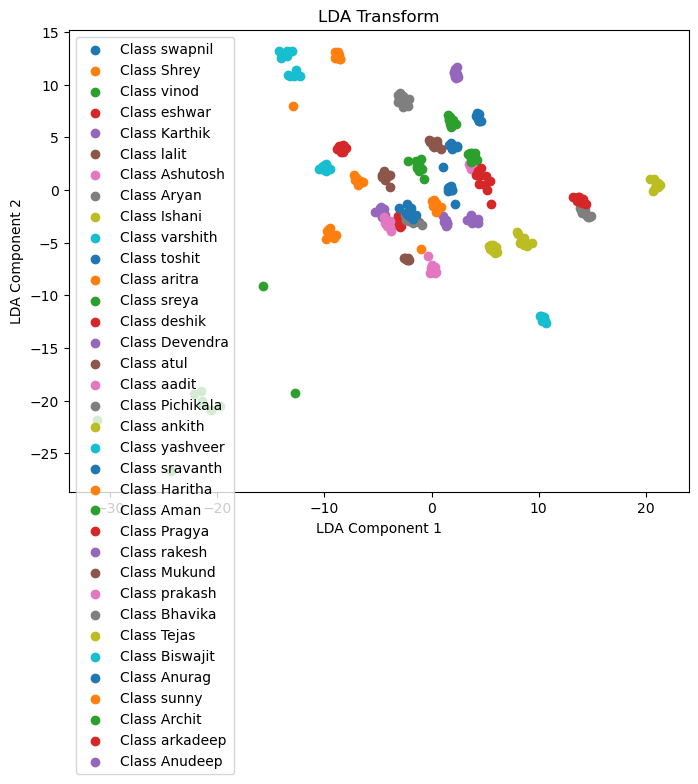

In [45]:
plt.figure(figsize=(8, 6))
for label in set(y_train):
    plt.scatter(images[y_train == label, 0], images[y_train == label, 1], label=f'Class {label}')

plt.title('LDA Transform')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()

C:\Users\deshik\AppData\Local\Temp\ipykernel_10064\1142927274.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')  # You can replace 'tab20' with any other colormap
C:\Users\deshik\AppData\Local\Temp\ipykernel_10064\1142927274.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(points_np[:, 0], points_np[:, 1], cmap=cmap)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


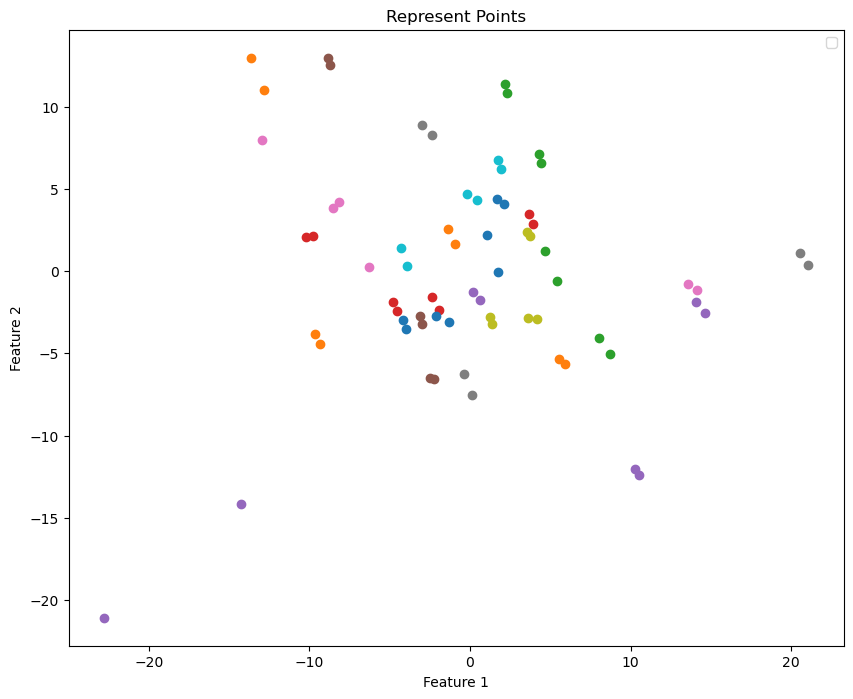

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'represent_points' contains the points and 'y_train' contains the labels

# Define colormap with a larger range of colors
cmap = plt.cm.get_cmap('tab20')  # You can replace 'tab20' with any other colormap

# Plot each set of points with corresponding labels
plt.figure(figsize=(10, 8))
for label in set(y_train):
    cnt = 1  # Initialize the counter outside the loop
    for i, points in enumerate(represent_points):
        if y_train[i] == label:
            points_np = np.array(points)
            plt.scatter(points_np[:, 0], points_np[:, 1], cmap=cmap)
            cnt = cnt + 1

plt.title('Represent Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
